<a href="https://colab.research.google.com/github/kothaneha8/DS-ML-AI-Practice/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Inetelligence

In [ ]:
# @title Computer Vision
'''
Uploading/Search images in Google lens.
Face Recognition
Self-Driving Cars
CCTV

AI Tools to understand:
* OpenCV - Open -source library.
* TensorFlow - For deep learning-based vision tasks.
* PyTorch - Research-heavy vision models.

'''

In [ ]:
# Installing OpenCV
!pip install opencv-python

In [ ]:
# @title Recognising Face in passport size photo
# Step 1: Installing and Importing Important Libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from google.colab import drive

In [ ]:
# Step 2: Uploading the images
uploaded=files.upload()

# Get the first uploaded file name if any files were uploaded
# next(iter(uploaded)) returns the first key in the uploaded dict (the filename) and increases the versions of it as user the same file.
filename=next(iter(uploaded))

# Print filename so we know which file was uploaded recently/successfully
print('Uploaded file',filename)


Saving 1.jpg to 1.jpg
Uploaded file 1.jpg


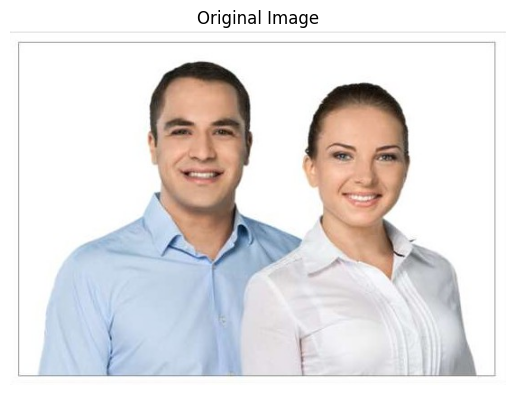

In [ ]:
# Step 3: Displaying the image

# Read the uploaded images from the disk into numpy array using OpenCV
img=cv2.imread(filename)

# Convert RGB for correct display in matplotlib
image_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Displaying image using matplotlib (cv2.imshow() won't work in colab)
plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

Text(0.5, 1.0, 'Rotated 90')

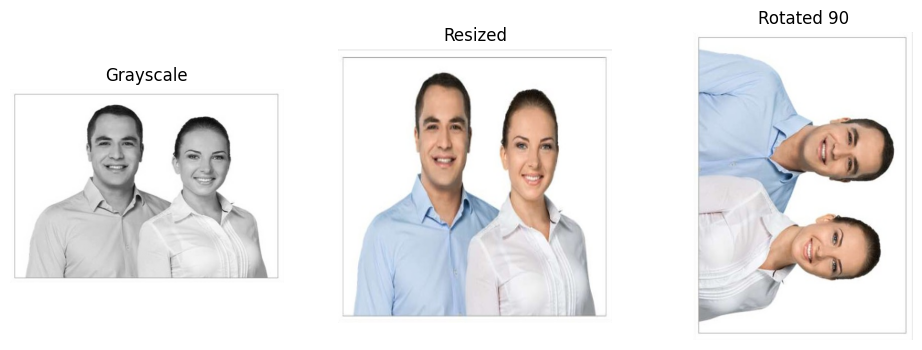

In [ ]:
# Step 4: Image Transformation
# Convert to Grayscale (reduce image to single intensity channel)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Resize the image to 300x300 pixels
resized=cv2.resize(img,(300,300))

# Rotate the image by 90 degrees clockwise
rotated=cv2.rotate(img,cv2.ROTATE_90_CLOCKWISE)

# Plot all images together
plt.figure(figsize=(12,4))

# Grayscale
plt.subplot(1,3,1)
plt.imshow(gray,cmap='gray')
plt.axis('off')
plt.title('Grayscale')

# Resized
plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(resized,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Resized')

# Rotated
plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(rotated,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title('Rotated 90')

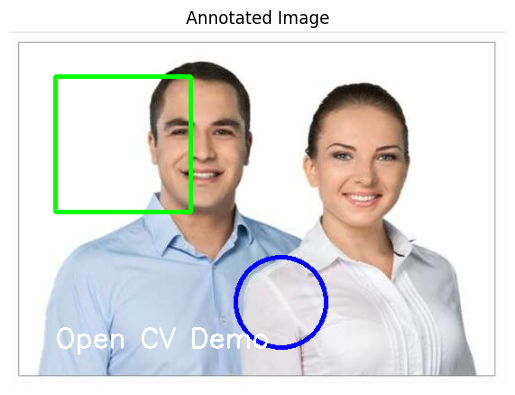

In [ ]:
# Step 5: Drawing Shapes and Adding Text
# Make a copy of the image so the original remains unchanged
img_copy=img.copy()

# Draw a green rectangle to the image
cv2.rectangle(img_copy,(50,50),(200,200),(0,255,0),3)

# Draw a blue circle
cv2.circle(img_copy,(300,300),50,(255,0,0),3)

# Write text on image
cv2.putText(img_copy,'Open CV Demo',(50,350),cv2.FONT_HERSHEY_SIMPLEX ,1,(255,255,255),2)

# Convert BGR to RGB for display
img_rgb=cv2.cvtColor(img_copy,cv2.COLOR_BGR2RGB)

# Display Image
plt.imshow(img_rgb)
plt.title('Annotated Image')
plt.axis('off')
plt.show()

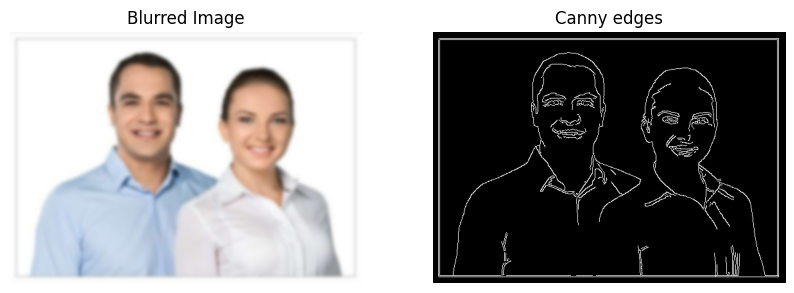

In [ ]:
# Step 6: Image Filtering(Blurring and Edge Detection)
# Apply Gaussian Blur to reduce noise
blurred=cv2.GaussianBlur(img,(15,15),0)

# Convert image to grayscale for edge detection
gray_img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

# Detect edge using canny edge detection
edges=cv2.Canny(gray,100,200)

# Disply blurred and edge images
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(blurred,cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges,cmap='gray')
plt.title('Canny edges')
plt.axis('off')
plt.show()

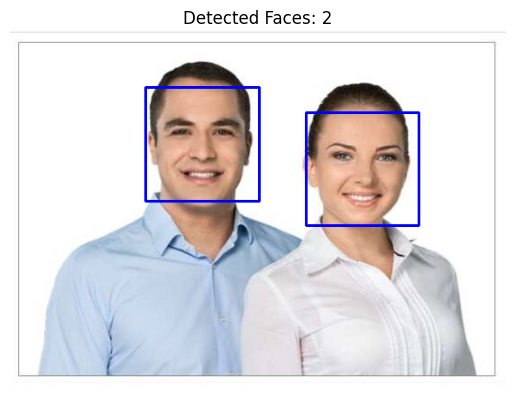

In [ ]:
# Step:7 Face Detection using Haar cascade
# Load the pre-trained Haar Cascade Classifier for face detection
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convert image to grayscale (as detector works better on grayscale)
gray_face=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Detect faces(returns x,y,width,height for each detected faces)
faces=face_cascade.detectMultiScale(gray_face,scaleFactor=1.1,minNeighbors=5,minSize=(30,30))

# Draw rectangles around detected faces
img_faces=img.copy()
for(x,y,w,h) in faces:
  cv2.rectangle(img_faces,(x,y),(x+w,y+h),(255,0,0),2)

# Convert to RGB for display
img_faces_rgb=cv2.cvtColor(img_faces,cv2.COLOR_BGR2RGB)

# Show Detected Faces
plt.imshow(img_faces_rgb)
plt.title(f'Detected Faces: {len(faces)}')
plt.axis('off')
plt.show()

# NLP(Natural Language Processing)

In [ ]:
# Step 1: Install and Import the important libraries

# Install NLP libraries
!pip install nltk textblob

# Import NLTK (Natural language toolkit) for text preprocessing
import nltk

# Import Textblob for simple sentiment analysis and NLP tasks
from textblob import TextBlob

# Download essential NLTK data (tokenizers,stopwords)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# Step 2:
review1='Must watch movie it was a great family entertrainer'
review2='It was okay,and the story was fine and litle boring'
review3='The film was awful and a complete waste of time'

In [ ]:
# Step 3: Sentiment analysis with TextBlob
# Analyze each reviw using TextBlob
for review in [review1,review2,review3]:
  blob=TextBlob(review)
  sentiment=blob.sentiment.polarity

  # Interpret sentiment
  if sentiment > 0.3:
    label='Positive'
  elif sentiment < -0.3:
    label='Negative'
  else:
    label='Neutral'
  # Print Result (moved inside the loop)
  print(f'Review: {review}')
  print(f'sentiment score: {sentiment} ➡️ {label}')
  print('-' * 30) # Add a separator for better readability

Review: Must watch movie it was a great family entertrainer
sentiment score: 0.8 ➡️ Positive
------------------------------
Review: It was okay,and the story was fine and litle boring
sentiment score: -0.29166666666666663 ➡️ Neutral
------------------------------
Review: The film was awful and a complete waste of time
sentiment score: -0.3666666666666667 ➡️ Negative
------------------------------


In [ ]:
# Step 4: Tokenization and Stopword removal
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Sample text for processing
text='Natural language processing makes the machines understand human language.'

# Tokenize (split text into words)
tokens=word_tokenize(text)
print('Tokens',tokens)

# Load stopwords (common words that add litle meaning)
stop_words=set(stopwords.words('english'))

# Remove
filtered_words=[word for word in tokens if word.lower() not in stop_words] # Corrected 'stopwords' to 'stop_words'
print('After Stopped Removal',filtered_words)

Tokens ['Natural', 'language', 'processing', 'makes', 'the', 'machines', 'understand', 'human', 'language', '.']
After Stopped Removal ['Natural', 'language', 'processing', 'makes', 'machines', 'understand', 'human', 'language', '.']


In [ ]:
# @title NLP Project Code
user_text=input('Enter your review or comment')

# Create a TextBlob
blob=TextBlob(user_text)

# Get the sentiment score -1 to +1
sentiment_score=blob.sentiment.polarity

# Determine Sentiment Label
if sentiment_score > 0.3:
  sentiment_label='Positive😊'
elif sentiment_score < -0.3:
  sentiment_score='Negative😒'
else:
  sentiment_score='Neutal😐'
print('Sentiment Analysis Score')
print(f'Text: {user_text}')
print(f'Sentiment Score: {sentiment_score}')
print(f'Sentiment: {sentiment_label}')

Enter your review or commentthis mouse was not good not bad,it worked fine but could have been better 
Sentiment Analysis Score
Text: this mouse was not good not bad,it worked fine but could have been better 
Sentiment Score: Neutal😐
Sentiment: Positive😊


# Object Detection using CV

In [ ]:
# Step 1: Installing and importing important libraries and models

# Import ultralytics YOLOv8
!pip install -q ultralytics opencv-python-headless matplotlib

# Import OpenCV for image read/format
import cv2

# Import the YOLO inference from ultralytics
from ultralytics import YOLO

# Import matplolib to display image
import matplotlib.pyplot as plt

# Import files helper to upload local files
from google.colab import files

# Import numpy for numeric operations
import numpy as np

# print versions so we can see what was installed
import ultralytics,sys
print('Ultralytics version',ultralytics.__version__)
print('OpenCV version',cv2.__version__)
print('Python version',sys.version)

Ultralytics version 8.3.241
OpenCV version 4.12.0
Python version 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]


In [ ]:
# Step 2: Upload the image
upload=files.upload()
if uploaded:
  img_path=next(iter(uploaded))
  print('Uploaded',img_path)
else:
  img_path='1.jpg'
  print('Downloaded sample img to',img_path)

Uploaded 1.jpg


In [ ]:
# Step 3: Load the YOLOv8 model and run inference
model=YOLO('yolov8n.pt')

# Run inference on the image path
results=model(img_path)

# Print a short summary of visibility
print('Completed inference.Number of result images',results)


image 1/1 /content/1.jpg: 416x640 8 persons, 425.3ms
Speed: 9.7ms preprocess, 425.3ms inference, 48.3ms postprocess per image at shape (1, 3, 416, 640)
Completed inference.Number of result images [ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon',

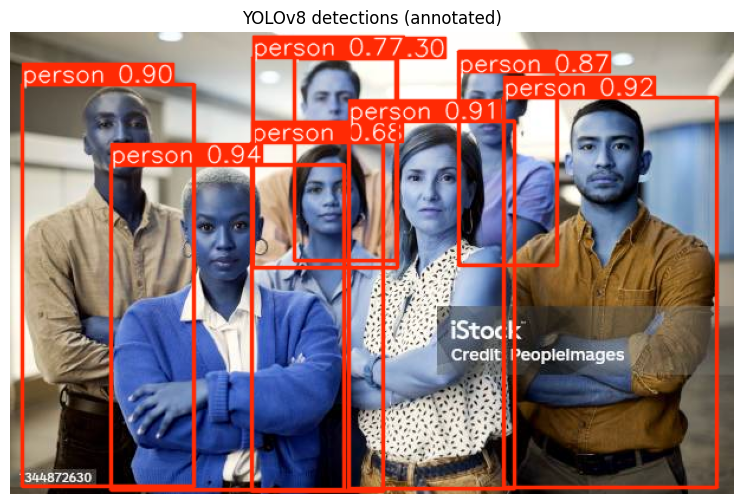

In [ ]:
from typing import Annotated
# Step 4: Display the visual output
res0=results[0].cpu()
annotated=res0.plot()

# The plot() output on RGB
plt.figure(figsize=(10,6))
img_faces=cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB)
plt.imshow(annotated)
plt.axis('off')
plt.title('YOLOv8 detections (annotated)')
plt.show()

# SQL (Structured Query Language)

In [ ]:
# Step 1: SQLite library connects to a database
import sqlite3

# Create a connection to a new or existing database file
conn=sqlite3.connect('school.db')

# Create a cursor object to execute SQL commands
cursor=conn.cursor()
print('Database created and connected sucessfully')

Database created and connected sucessfully


In [ ]:
# Step 2: Create the table
cursor.execute('''
create table Students (
    ID int,
    Name varchar(50),
    Marks int
)
''')
print('Table created sucessfully')

Table created sucessfully


In [ ]:
# Step 3: Insert the data into table
cursor.execute('''
insert into Students
(ID,Name,Marks)
values
(1,'Alice',90),
(2,'Bob',80),
(3,'David',70),
(4,'Emma',74),
(5,'Lina',86),
(6,'Sophia',64),
(7,'Noah',72),
(8,'Olivia',73),
(9,'Mason',76),
(10,'Ava',89),
(11,'Ethan',86),
(12,'Isabella',76),
(13,'Logan',92),
(14,'Mia',78),
(15,'James',65);
''')
print('Data inserted successfully')

Data inserted successfully


In [ ]:
# Step 4: Display the table
cursor.execute(
    '''
    select * from Students;
    '''
)
rows=cursor.fetchall()
for row in rows:
  print(row)

(1, 'Alice', 90)
(2, 'Bob', 80)
(3, 'David', 70)
(4, 'Emma', 74)
(5, 'Lina', 86)
(6, 'Sophia', 64)
(7, 'Noah', 72)
(8, 'Olivia', 73)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(12, 'Isabella', 76)
(13, 'Logan', 92)
(14, 'Mia', 78)
(15, 'James', 65)
(1, 'Alice', 90)
(2, 'Bob', 80)
(3, 'David', 70)
(4, 'Emma', 74)
(5, 'Lina', 86)
(6, 'Sophia', 64)
(7, 'Noah', 72)
(8, 'Olivia', 73)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(12, 'Isabella', 76)
(13, 'Logan', 92)
(14, 'Mia', 78)
(15, 'James', 65)


In [ ]:
# Where condition
cursor.execute(
    '''
    select * from Students where marks > 80;
    '''
)
rows=cursor.fetchall()
for row in rows:
  print(row)

(1, 'Alice', 90)
(5, 'Lina', 86)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(13, 'Logan', 92)
(1, 'Alice', 90)
(5, 'Lina', 86)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(13, 'Logan', 92)


In [ ]:
# Step 5: Update the data
cursor.execute('''
update Students set Marks=92 where ID =2;
''')
cursor.execute('''
update Students set Marks=88 where ID =4;
''')

# After updating, select and display the updated data
cursor.execute('''
select Name,Marks from Students where ID=2 or ID=4;
''')
rows=cursor.fetchall()
print('Updated Students data:')
for row in rows:
  print(row)

Updated Students data:
('Bob', 92)
('Emma', 88)
('Bob', 92)
('Emma', 88)


In [ ]:
# Delete data
cursor.execute('''
delete from Students where ID=3
''')
cursor.execute('''
select * from Students
''')
rows=cursor.fetchall()
print('Updated Students data:')
for row in rows:
  print(row)

Updated Students data:
(1, 'Alice', 90)
(2, 'Bob', 92)
(4, 'Emma', 88)
(5, 'Lina', 86)
(6, 'Sophia', 64)
(7, 'Noah', 72)
(8, 'Olivia', 73)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(12, 'Isabella', 76)
(13, 'Logan', 92)
(14, 'Mia', 78)
(15, 'James', 65)
(1, 'Alice', 90)
(2, 'Bob', 92)
(4, 'Emma', 88)
(5, 'Lina', 86)
(6, 'Sophia', 64)
(7, 'Noah', 72)
(8, 'Olivia', 73)
(9, 'Mason', 76)
(10, 'Ava', 89)
(11, 'Ethan', 86)
(12, 'Isabella', 76)
(13, 'Logan', 92)
(14, 'Mia', 78)
(15, 'James', 65)


In [ ]:
# SQL queries for Data Analysis
# Find Average marks of class
cursor.execute('select avg(Marks) from Students;')
rows=cursor.fetchall()
for row in rows:
  print(row)

(80.5,)


In [ ]:
# Find maximum marks of class
cursor.execute('select Name,Max(Marks) from Students ;')
rows=cursor.fetchall()
for row in rows:
  print(row)

('Bob', 92)


In [ ]:
# @title Setting up Database using csv Dataset
import sqlite3
import pandas as pd
from google.colab import files
# Create connection to a new database
conn=sqlite3.connect('nba.db')
cursor=conn.cursor()

In [ ]:
# Upload your csv file from your system
uploaded=files.upload()

Saving nba.csv to nba.csv


In [ ]:
# save csv to df
df=pd.read_csv('nba.csv')
print(df.head(10))

            Name            Team  Number Position  Age  Height(Inch)  Weight  \
0  Avery Bradley  Boston Celtics       0       PG   25           6.2     180   
1    Jae Crowder  Boston Celtics      99       SF   25           6.6     235   
2   John Holland  Boston Celtics      30       SG   27           6.5     205   
3    R.J. Hunter  Boston Celtics      28       SG   22           6.5     185   
4  Jonas Jerebko  Boston Celtics       8       PF   29           6.1     231   
5   Amir Johnson  Boston Celtics      90       PF   29           6.9     240   
6  Jordan Mickey  Boston Celtics      55       PF   21           6.8     235   
7   Kelly Olynyk  Boston Celtics      41        C   25           7.0     238   
8   Terry Rozier  Boston Celtics      12       PG   22           6.2     190   
9   Marcus Smart  Boston Celtics      36       PG   22           6.4     220   

             College      Salary  
0              Texas   7730337.0  
1          Marquette   6796117.0  
2  Boston Univ

In [ ]:
!pip install -q pandasql
from pandasql import sqldf

  Preparing metadata (setup.py) ... done


In [ ]:
# Define a helper function
pysqldf=lambda q:sqldf(q,globals())

# Example SQL query
query='select * from df'
result=pysqldf(query)
print(result)

              Name            Team  Number Position  Age  Height(Inch)  \
0    Avery Bradley  Boston Celtics       0       PG   25           6.2   
1      Jae Crowder  Boston Celtics      99       SF   25           6.6   
2     John Holland  Boston Celtics      30       SG   27           6.5   
3      R.J. Hunter  Boston Celtics      28       SG   22           6.5   
4    Jonas Jerebko  Boston Celtics       8       PF   29           6.1   
..             ...             ...     ...      ...  ...           ...   
452     Trey Lyles       Utah Jazz      41       PF   20           6.1   
453   Shelvin Mack       Utah Jazz       8       PG   26           6.3   
454      Raul Neto       Utah Jazz      25       PG   24           6.1   
455   Tibor Pleiss       Utah Jazz      21        C   26           7.3   
456    Jeff Withey       Utah Jazz      24        C   26           7.0   

     Weight            College     Salary  
0       180              Texas  7730337.0  
1       235          Ma

In [ ]:
# Example SQL query where weight is less than 150
query='select * from df where weight<200'
result=pysqldf(query)
print(result)

             Name                    Team  Number Position  Age  Height(Inch)  \
0   Avery Bradley          Boston Celtics       0       PG   25           6.2   
1     R.J. Hunter          Boston Celtics      28       SG   22           6.5   
2    Terry Rozier          Boston Celtics      12       PG   22           6.2   
3   Isaiah Thomas          Boston Celtics       4       PG   27           5.9   
4    Markel Brown           Brooklyn Nets      22       SG   24           6.3   
..            ...                     ...     ...      ...  ...           ...   
92   Luis Montero  Portland Trail Blazers      44       SG   23           6.7   
93  Brian Roberts  Portland Trail Blazers       2       PG   30           6.1   
94     Trey Burke               Utah Jazz       3       PG   23           6.1   
95     Dante Exum               Utah Jazz      11       PG   20           6.6   
96      Raul Neto               Utah Jazz      25       PG   24           6.1   

    Weight         College 

In [ ]:
# Display Name,Team Name,Positon where players age is less than 35 for PG or SF
query="select Name,Team,position from df where age<28 and position in ('PG','SF')"
result=pysqldf(query)
print(result)


               Name            Team Position
0     Avery Bradley  Boston Celtics       PG
1       Jae Crowder  Boston Celtics       SF
2      Terry Rozier  Boston Celtics       PG
3      Marcus Smart  Boston Celtics       PG
4     Isaiah Thomas  Boston Celtics       PG
..              ...             ...      ...
102      Dante Exum       Utah Jazz       PG
103  Gordon Hayward       Utah Jazz       SF
104   Chris Johnson       Utah Jazz       SF
105    Shelvin Mack       Utah Jazz       PG
106       Raul Neto       Utah Jazz       PG

[107 rows x 3 columns]


In [ ]:
# Find the average age according to the position
query='select position,avg(age) from df group by position'
result=pysqldf(query)
print(result)

  Position   avg(age)
0        C  27.371795
1       PF  27.160000
2       PG  26.847826
3       SF  26.858824
4       SG  26.539216


In [ ]:
# Display the top 10 salaries of the players along with their name,team and salary
query="select Name,Team,salary from df order by salary DESC limit 10"
result=pysqldf(query)
print(result)


              Name                   Team      Salary
0      Kobe Bryant     Los Angeles Lakers  25000000.0
1     LeBron James    Cleveland Cavaliers  22970500.0
2  Carmelo Anthony        New York Knicks  22875000.0
3    Dwight Howard        Houston Rockets  22359364.0
4       Chris Bosh             Miami Heat  22192730.0
5       Chris Paul   Los Angeles Clippers  21468695.0
6     Kevin Durant  Oklahoma City Thunder  20158622.0
7     Derrick Rose          Chicago Bulls  20093064.0
8      Dwyane Wade             Miami Heat  20000000.0
9      Brook Lopez          Brooklyn Nets  19689000.0


In [ ]:
# Find the average salary based on Teams
query='select Team,avg(salary) as Average_salary from df group by Team order by avg(salary) DESC'
result=pysqldf(query)
print(result)

                      Team  Average_salary
0      Cleveland Cavaliers    7.642049e+06
1               Miami Heat    6.347359e+06
2     Los Angeles Clippers    6.323643e+06
3    Oklahoma City Thunder    6.251020e+06
4    Golden State Warriors    5.924600e+06
5            Chicago Bulls    5.785559e+06
6        San Antonio Spurs    5.629516e+06
7        Memphis Grizzlies    5.467920e+06
8        Charlotte Hornets    5.222728e+06
9       Washington Wizards    5.088576e+06
10         Houston Rockets    5.018868e+06
11           Atlanta Hawks    4.860197e+06
12      Los Angeles Lakers    4.784695e+06
13        Sacramento Kings    4.778911e+06
14        Dallas Mavericks    4.746582e+06
15         Toronto Raptors    4.741174e+06
16  Minnesota Timberwolves    4.593054e+06
17         New York Knicks    4.581494e+06
18         Detroit Pistons    4.477884e+06
19          Indiana Pacers    4.450122e+06
20    New Orleans Pelicans    4.355304e+06
21         Milwaukee Bucks    4.350220e+06
22         

In [ ]:
# @title SQL with Python (Dual Datasets)
import sqlite3
import pandas as pd

# Create a connection to a new database
conn = sqlite3.connect('company.db')
cursor = conn.cursor()

In [ ]:
# Creating Employees Table
cursor.execute('''
create table Employees (
  EmpID INTEGER PRIMARY KEY AUTOINCREMENT,
  Name Text not null,
  Age int,
  DepartmentID int,
  Salary REAL,
  Experience int
)
''')

# Create Departments Table
cursor.execute('''
Create table Departments (
  DeptID INTEGER PRIMARY KEY AUTOINCREMENT,
  DeptName Text not null,
  Location Text
)
''')

In [ ]:
# Departments Data
departments = [
    ('HR', 'Hyderbad'),
    ('IT', 'Mumbai'),
    ('Finance', 'Delhi'),
    ('Marketing', 'Bangalore'),
    ('Operations','Kolkata')
    ]

cursor.executemany('Insert into Departments (DeptName, Location) values (?,?)', departments)

In [ ]:
# Employees Data
employees = [
    ('Alice', 30, 1, 60000, 5),
    ('Bob', 35, 2, 85000, 8),
    ('Charlie', 28, 3, 55000, 3),
    ('David', 40, 4, 95000, 10),
    ('Eva', 25, 2, 50000, 2),
    ('Frank', 45, 3, 105000, 15),
    ('Grace', 32, 1, 72000, 6),
    ('Hannah', 29, 4, 68000, 4),
    ('Ian', 38, 5, 88000, 9),
    ('Jack', 50, 2, 110000, 20),
    ('Karen', 27, 5, 56000, 3),
    ('Leo', 33, 4, 75000, 7),
    ('Mia', 26, 1, 52000, 2),
    ('Nick', 31, 3, 70000, 5),
    ('Olivia', 37, 2, 92000, 10),
    ('Paul', 42, 5, 99000, 12),
    ('Quinn', 34, 4, 78000, 8),
    ('Rita', 24, 1, 48000, 1),
    ('Sam', 29, 3, 65000, 4),
    ('Tom', 39, 2, 97000, 11)
]

cursor.executemany('Insert into Employees (Name, Age, DepartmentID, Salary, Experience) values (?,?,?,?,?)', employees)

In [ ]:
'''cursor.execute('Select * from Employees')

rows = cursor.fetchall()

for row in rows:
  print(row)'''

pd.read_sql_query('Select * from Employees', conn)

,EmpID,Name,Age,DepartmentID,Salary,Experience
0,1,Alice,30,1,60000.0,5
1,2,Bob,35,2,85000.0,8
2,3,Charlie,28,3,55000.0,3
3,4,David,40,4,95000.0,10
4,5,Eva,25,2,50000.0,2
5,6,Frank,45,3,105000.0,15
6,7,Grace,32,1,72000.0,6
7,8,Hannah,29,4,68000.0,4
8,9,Ian,38,5,88000.0,9
9,10,Jack,50,2,110000.0,20


In [ ]:
pd.read_sql_query('select * from Departments',conn)

,DeptID,DeptName,Location
0,1,HR,Hyderbad
1,2,IT,Mumbai
2,3,Finance,Delhi
3,4,Marketing,Bangalore
4,5,Operations,Kolkata


In [ ]:
# @title Q1
# Show only Names and Salaries of Employees
pd.read_sql_query('select Name,salary from Employees',conn)

,Name,Salary
0,Alice,60000.0
1,Bob,85000.0
2,Charlie,55000.0
3,David,95000.0
4,Eva,50000.0
5,Frank,105000.0
6,Grace,72000.0
7,Hannah,68000.0
8,Ian,88000.0
9,Jack,110000.0


In [ ]:
# @title Q2
# Find Employees Names earning more than 80000
pd.read_sql_query('select Name from Employees where salary > 80000',conn)

,Name
0,Bob
1,David
2,Frank
3,Ian
4,Jack
5,Olivia
6,Paul
7,Tom


In [ ]:
# @title Q3
# List Employees Name and Experience with Experience > 5 Years
pd.read_sql_query('select Name,Experience from Employees where Experience > 5',conn)

,Name,Experience
0,Bob,8
1,David,10
2,Frank,15
3,Grace,6
4,Ian,9
5,Jack,20
6,Leo,7
7,Olivia,10
8,Paul,12
9,Quinn,8


In [ ]:
# @title Q4
# Sort Employees by Salary (Descending)
pd.read_sql_query('select * from Employees order by salary desc',conn)

,EmpID,Name,Age,DepartmentID,Salary,Experience
0,10,Jack,50,2,110000.0,20
1,6,Frank,45,3,105000.0,15
2,16,Paul,42,5,99000.0,12
3,20,Tom,39,2,97000.0,11
4,4,David,40,4,95000.0,10
5,15,Olivia,37,2,92000.0,10
6,9,Ian,38,5,88000.0,9
7,2,Bob,35,2,85000.0,8
8,17,Quinn,34,4,78000.0,8
9,12,Leo,33,4,75000.0,7


In [ ]:
# @title Q5
# Find Average Salary of all Employees
pd.read_sql_query('select avg(salary) as Average_Salary from Employees',conn)

,Average_Salary
0,76000.0


In [ ]:
# @title Q6
# Count Total number of Employees
pd.read_sql_query('select count(*) as No_of_Employees from Employees',conn)

,No_of_Employees
0,20


In [ ]:
# @title Q7
# Show Employees between age 30 and 40
pd.read_sql_query('select Name from Employees where Age BETWEEN 30 and 40',conn)

,Name
0,Alice
1,Bob
2,David
3,Grace
4,Ian
5,Leo
6,Nick
7,Olivia
8,Quinn
9,Tom


In [ ]:
# @title Q8
# Show 5 Highest Paid Employee
pd.read_sql_query('select Name,Salary from Employees order by Salary desc limit 5',conn)

,Name,Salary
0,Jack,110000.0
1,Frank,105000.0
2,Paul,99000.0
3,Tom,97000.0
4,David,95000.0


In [ ]:
# @title Q9
# Find total Salary expense per Department Name
# pd.read_sql_query("Select DepartmentID, sum(Salary) as Total_Salary_Spent from Employees group by DepartmentID order by Total_Salary_Spent desc", conn)
pd.read_sql_query('''
Select D.DeptName, sum(E.Salary) as Total_salary
from Employees E
JOIN Departments D
on E.DepartmentID = D.DeptID
group by D.DeptName
''',conn)

,DeptName,Total_salary
0,Finance,295000.0
1,HR,232000.0
2,IT,434000.0
3,Marketing,316000.0
4,Operations,243000.0


In [ ]:
# @title Q10
# Find Average Experience per Department
pd.read_sql_query('''
select D.DeptName, avg(E.Experience) as Average_Esperience
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName
''',conn)

,DeptName,Average_Esperience
0,Finance,6.75
1,HR,3.50
2,IT,10.20
3,Marketing,7.25
4,Operations,8.00


In [ ]:
# @title Q11
# Show employees from the IT department
pd.read_sql_query('''
select E.Name,D.DeptName
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
where D.DeptName='IT'
''',conn)

,Name,DeptName
0,Bob,IT
1,Eva,IT
2,Jack,IT
3,Olivia,IT
4,Tom,IT


In [ ]:
# @title Q12
# Count Employees per department
pd.read_sql_query('''
select D.DeptName, count(E.EmpID) as No_of_Employees
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName order by No_of_Employees desc
''',conn)

,DeptName,No_of_Employees
0,IT,5
1,Marketing,4
2,HR,4
3,Finance,4
4,Operations,3


In [ ]:
# @title Q13
# Find employees with letter a consisting in thier names
pd.read_sql_query('''
Select Name from Employees where Name LIKE '%a%'
''',conn)

,Name
0,Alice
1,Charlie
2,David
3,Eva
4,Frank
5,Grace
6,Hannah
7,Ian
8,Jack
9,Karen


In [ ]:
# @title Q14
# Find Employees working in Bangalore
pd.read_sql_query('''
select E.Name,D.Location
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
where D.Location='Bangalore'
''',conn)

,Name,Location
0,David,Bangalore
1,Hannah,Bangalore
2,Leo,Bangalore
3,Quinn,Bangalore


In [ ]:
# @title Q15
# Find Department with the Maximum Average Salary
pd.read_sql_query('''
select D.DeptName, avg(E.salary) as Average_Salary
from Employees E
join Departments D
on E.DepartmentID=D.DeptID
group by D.DeptName order by Average_Salary desc limit 1
''',conn)

,DeptName,Average_Salary
0,IT,86800.0


In [ ]:
# @title Q16
# Find Employees having experience less than 3 years and salary above 40k
pd.read_sql_query('select Name,Experience,Salary from Employees where Experience < 3 and Salary > 40000',conn)

,Name,Experience,Salary
0,Eva,2,50000.0
1,Mia,2,52000.0
2,Rita,1,48000.0


In [ ]:
# @title Q17
# Increase salary by 10% for Employees in the HR department
cursor.execute('''
update Employees set Salary=Salary*1.1 where DepartmentID=(select DeptID from Departments where DeptName='HR')
''')

In [ ]:
# @title Q18
# Find employees earning above the departments average
pd.read_sql_query('''
Select E.Name, E.Salary, D.DeptName
from Employees E
join Departments D
on E.DepartmentID = D.DeptID
where E.Salary > (Select Avg(Salary) from Employees where DepartmentID = E.DepartmentID)
''',conn)

,Name,Salary,DeptName
0,Alice,66000.0,HR
1,David,95000.0,Marketing
2,Frank,105000.0,Finance
3,Grace,79200.0,HR
4,Ian,88000.0,Operations
5,Jack,110000.0,IT
6,Olivia,92000.0,IT
7,Paul,99000.0,Operations
8,Tom,97000.0,IT


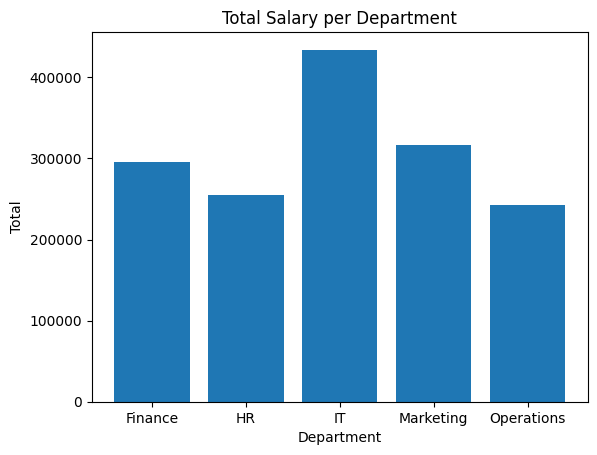

In [ ]:
# @title Visualisation using SQL queries
import matplotlib.pyplot as plt
df=pd.read_sql_query('''
Select D.DeptName, Sum(E.Salary) as Total_Salary
from Employees E
join Departments D
on E.DepartmentID = D.DeptID
Group by D.DeptName
''',conn)

plt.bar(df['DeptName'],df['Total_Salary'])
plt.title('Total Salary per Department')
plt.xlabel('Department')
plt.ylabel('Total')
plt.show()

# Generative Models


In [ ]:
# Step 1: Important Libraries
import torch
import matplotlib.pyplot as plt

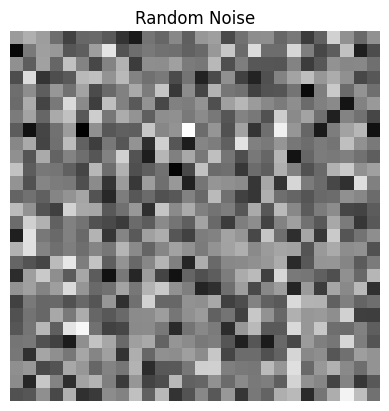

In [ ]:
# Step 2: Generate Random Noise(Image)
# A tensor of 28x28 pixels
noise=torch.randn(28,28)

# Display the noise as an image
plt.imshow(noise,cmap='gray')
plt.title('Random Noise')
plt.axis('off')
plt.show()

In [ ]:
# Step 3: Simulate a Simple Generator Function
def simple_genarator(noise):
  # Apply a simple transformation (nonlinear activation + scaling)
  generated=torch.tanh(noise*2)
  return generated

# Image from 1990 - 45kb
# Upload the image to Ai model (transforms the image)
# 45kb - 90kb

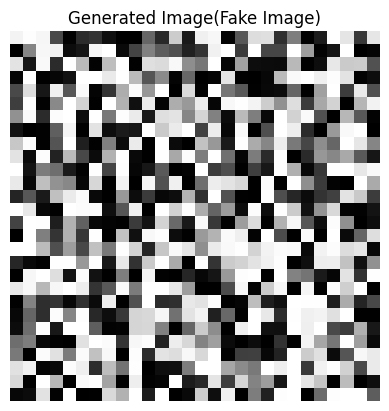

In [ ]:
# Step 4: Pass noise through the generator
improved_img=simple_genarator(noise)

# Display the generated image
plt.imshow(improved_img.detach(),cmap='gray')
plt.title('Generated Image(Fake Image)')
plt.axis('off')
plt.show()

# Introduction to PyTorch

In [1]:
# Step 1: Install and Import PyTorch
import torch
print('PyTorch version',torch.__version__)

PyTorch version 2.9.0+cpu


In [3]:
# Step 2: Creating a Tensor
# Create a 1D tensor(similar to a list or an array)
x=torch.tensor([2,4,6,8,10])

# Print the tensor
print('Tensor x:',x)

# Check it's datatype
print('Type',type(x))

Tensor x: tensor([ 2,  4,  6,  8, 10])
Type <class 'torch.Tensor'>


In [7]:
# Step 3: Basic Tensor Operations
a=torch.tensor([1,2,3])
b=torch.tensor([4,5,6])

# Add two tensors
add_result=a+b
print('Addition',add_result)

# Multiply two tensors
mul_result=a*b
print('Multiplication',mul_result)

# Mean of tensore
mean_result=torch.mean(a.float())
print('Mean of a',mean_result)

# Max of tensor
max_result=torch.max(a)
print('Max of a',max_result)

Addition tensor([5, 7, 9])
Multiplication tensor([ 4, 10, 18])
Mean of a tensor(2.)
Max of a tensor(3)


In [8]:
# Step 4: Creating Random Tensors
# Create a random tensor of shape(2,4)
random_tensor=torch.rand(4,2)
print('Random tensor',random_tensor)

Random tensor tensor([[0.1639, 0.7005],
        [0.7538, 0.7698],
        [0.2494, 0.7686],
        [0.8791, 0.5033]])


In [10]:
# Step 5: Performing Matrix multiplication
# Create 2 Matrices (2x3 and 3x2)
mat1=torch.tensor([[1,2,3],
                   [4,5,6]])
mat2=torch.tensor([[7,8],
                  [9,10],
                  [11,12]])
# Perform matrix multiplication
result=torch.matmul(mat1,mat2)
print(result)

tensor([[ 58,  64],
        [139, 154]])


In [12]:
# Step 6: Using GPU
device='cuda' if torch.cuda.is_available() else 'cpu'
print('Using device',device)

# Move tensor to GPU if available
x_gpu=x.to(device)
print('Tensor Moved to',x_gpu.device)

Using device cpu
Tensor Moved to cpu


# Mini Real-World Example:Linear Regression with PyTorch

In [13]:
# Predict y=2x+1
# Step 1: Create sample data
import torch
x=torch.tensor([[1.0],[2.0],[3.0],[4.0]]) # Input Feature
y=torch.tensor([[3.0],[5.0],[7.0],[9.0]]) # Target (Prediction/Label)

In [16]:
# Step 2: Define a Simple Linear Model
# Import required pyTorch modules
import torch.nn as nn

# Define a linear model with 1 input and 1 output
model=nn.Linear(in_features=1,out_features=1)

# Print Model Parameters
print('Model parameters',list(model.parameters()))

Model parameters [Parameter containing:
tensor([[-0.0263]], requires_grad=True), Parameter containing:
tensor([-0.2590], requires_grad=True)]


In [17]:
# Step 3: Define Loss Function and Optimizer
# Define the Mean Squared Loss (Loss function measures how far predictions are from actual values)
criterion=nn.MSELoss()

# Use SGD Stohastic Gradient Descent optimizer (Optimizes/updates weights to minimize the loss)
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [18]:
# Train the Model
# Training loop for 100 epochs
for epoch in range(100):
  # Forward pass: predict y using model
  y_pred=model(x)
  # 11 - 2 = 9
  # Compute Loss
  loss=criterion(y_pred,y)

  # Backward loss: Compute gradients(optimizer)
  optimizer.zero_grad()
  loss.backward()

  # Update model weights
  optimizer.step()

  # Print loss every 20 epochs
  if (epoch+1) % 20 == 0:
    print(f'Epoch [{epoch+1}/100,Loss:{loss.item():4f}]')

Epoch [20/100,Loss:0.082365]
Epoch [40/100,Loss:0.034503]
Epoch [60/100,Loss:0.030578]
Epoch [80/100,Loss:0.027122]
Epoch [100/100,Loss:0.024056]


In [24]:
# Step 5: Test the model
x_test=torch.tensor([[10.0]])
y_test_pred=model(x_test)
print('Predicted value for y is',y_test_pred.item())

Predicted value for y is 21.908592224121094


# Fundamentals Concepts of Generative AI - Autoencoders

In [ ]:
# Step 1: Import Required Libraries
import torch
import torch.nn as nn
import torch.optim
import matplotlib.pyplot as plt

In [ ]:
# Step 2: Create Synthetic Data
# Autoencoders do not need labels.
# They learn by trying to reconstruct the input itself.
data = torch.randn(100, 10) # 100 samples, each with 10 features
print('Shape of the data',data.shape)

Shape of the data torch.Size([100, 10])


In [ ]:
# Step 3: Define the Autoencoder Model

# Define a simple Autoencoder class
class Autoencoder(nn.Module):
  def __init__(self):
    super(Autoencoder, self).__init__()

  # Encoder: reduces 10 - 5 - 2 dimensions
    self.encoder = nn.Sequential(
        nn.Linear(10,5),  # input layer (10) - hidden layer (5)
        nn.ReLU(), # non-linear activation
        nn.Linear(5,2) # hidden layer(5) - Latent code (2)
    )

    # Decoder: reconstructs 2 - 5 - 10 dimensions
    self.decoder = nn.Sequential(
        nn.Linear(2,5),
        nn.ReLU(),
        nn.Linear(5,10),
        nn.Sigmoid() # ensures output between 0 and 1
    )
  def forward(self, x):
        encoded = self.encoder(x) # Compress input
        decoded = self.decoder(encoded) # Reconstruct Input
        return decoded

In [ ]:
# Intialize Model, Loss Function and Optimizer

# Create Model object
model=Autoencoder()

# Define Loss function (Mean Squared Error)
criterion=nn.MSELoss()

# Define optimizer (SGD = Stohastic Gradient Descent)
optimizer=torch.optim.SGD(model.parameters())

In [ ]:
# Step 5: Train the Autoencoder
# Train the Model
epochs=100
losses=[]
for epoch in range(epochs):
  # Reset Gradients
  optimizer.zero_grad()
  outputs = model(data) # Forward pass (input-output)
  loss = criterion(outputs, data) # Compare output with input
  loss.backward() # Backward pass (Calculate what is missing)
  optimizer.step() # Update weights
  losses.append(loss.item()) # Store loss for plotting
  if (epoch + 1) % 20 == 0:
    print(f'Epoch [{epoch + 1}/{epochs}, Loss: {loss.item()}]')

Epoch [20/100, Loss: 1.2417405843734741]
Epoch [40/100, Loss: 1.2415369749069214]
Epoch [60/100, Loss: 1.2413337230682373]
Epoch [80/100, Loss: 1.241131067276001]
Epoch [100/100, Loss: 1.2409285306930542]


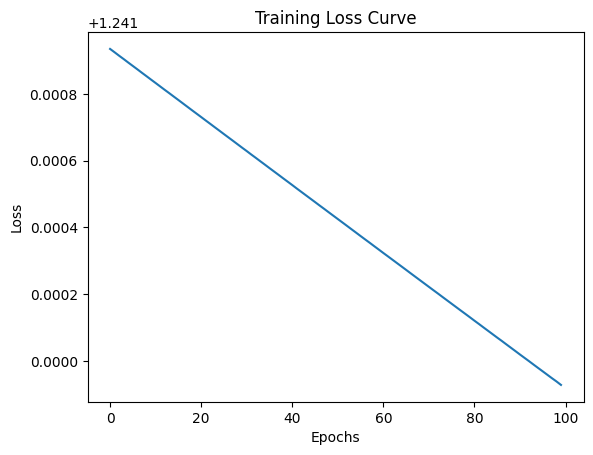

In [ ]:
# Step 6: Plot the Loss curve
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()